In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
sns.set()  # for plot styling
%matplotlib inline  

In [2]:
cols = ['event',
        'match_id',
        'team_id',
        'player',
        'timestamp',
        'pos_x',
        'pos_y',
       ]

data = pd.read_csv('match_positions_separated.csv', header=None, names=cols)
data = data[data['pos_x'] > 5000]  # this positions less than 5000 have no data

In [3]:
data['match_id'].unique()

array([2500623971, 2500632973, 2500694760, 2500724300, 2500811393,
       2500816344, 2500881491, 2500916535, 2501003221, 2501007313])

In [4]:
data = data[data['match_id'] == 2500623971]

In [5]:
data.shape

(88133, 7)

In [7]:
min(data['pos_x'])
min(data['pos_y'])

9312.0

In [196]:
offset = 100
min_pos_x = min(data['pos_x']) - offset
min_pos_y = min(data['pos_y']) - offset

In [197]:
data['pos_x'] = data['pos_x'] - min_pos_x
data['pos_y'] = data['pos_y'] - min_pos_x

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


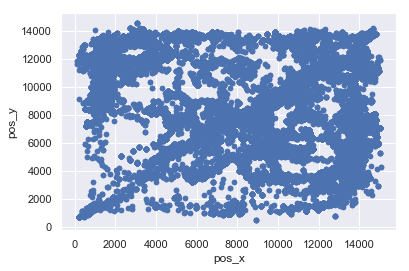

In [198]:
data.plot.scatter('pos_x', 'pos_y')

In [10]:
filtered_events = ['DOTA_COMBATLOG_MAKE_DAMAGE',
                   'DOTA_COMBATLOG_GET_DAMAGE',
                   'DOTA_COMBATLOG_KILL',
                   'DOTA_COMBATLOG_DEATH']

data_fl = data[data['event'].isin(filtered_events)]

In [11]:
data_fl.shape

(53388, 7)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


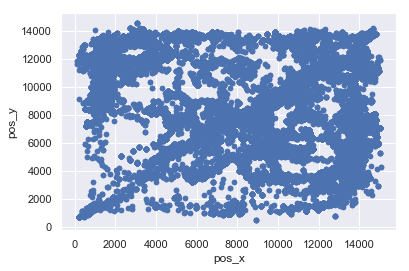

In [12]:
data.plot.scatter('pos_x', 'pos_y')

In [13]:
kmeans = KMeans(n_clusters=100).fit(data_fl[['timestamp', 'pos_x', 'pos_y']])

/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really 

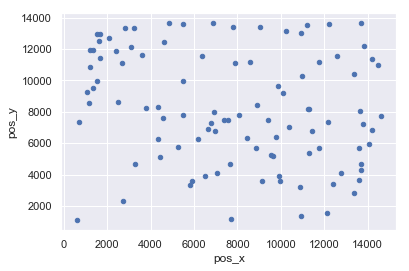

In [14]:
data_fl.loc[:, 'label'] = kmeans.labels_
cc = pd.DataFrame(kmeans.cluster_centers_, columns=['timestamp', 'pos_x', 'pos_y'])
cc.plot.scatter('pos_x', 'pos_y')

In [15]:
data_fl.groupby(['label']).size()

label
0      329
1      879
2      511
3      702
4      593
5     1308
6      609
7       76
8      202
9      320
10     368
11     434
12     794
13     562
14     404
15     865
16    1409
17     424
18     471
19     798
20    1699
21     475
22     595
23      90
24     400
25     423
26     662
27     638
28     233
29     440
      ... 
70     435
71     879
72     285
73     686
74     466
75     430
76     509
77     546
78     812
79     461
80     522
81     388
82     131
83     266
84     705
85     232
86     264
87     571
88     236
89     633
90     427
91     448
92     477
93     519
94     618
95     276
96     144
97     258
98     164
99     220
Length: 100, dtype: int64

In [16]:
data_fl[data_fl['label']==0]

,event,match_id,team_id,player,timestamp,pos_x,pos_y,label
21464,DOTA_COMBATLOG_GET_DAMAGE,2500623971,2,heroalchemist,2404,9408.0,5824.0,0
21467,DOTA_COMBATLOG_GET_DAMAGE,2500623971,2,heroalchemist,2404,9408.0,5824.0,0
21469,DOTA_COMBATLOG_GET_DAMAGE,2500623971,2,heroalchemist,2405,9011.0,6195.0,0
21471,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,2405,9011.0,6195.0,0
21475,DOTA_COMBATLOG_GET_DAMAGE,2500623971,2,heroalchemist,2406,9133.0,6061.0,0
25792,DOTA_COMBATLOG_GET_DAMAGE,2500623971,2,herobountyhunter,2430,9376.0,5792.0,0
25800,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herobountyhunter,2435,8484.0,4644.0,0
25805,DOTA_COMBATLOG_KILL,2500623971,2,herobountyhunter,2435,8484.0,4644.0,0
42125,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herodarkseer,2388,8805.0,5733.0,0
42126,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herodarkseer,2388,8805.0,5733.0,0


In [17]:
label_0 = data_fl[data_fl['label']==0]

In [18]:
kmeans_label_0 = KMeans(n_clusters=20).fit(label_0[['timestamp', 'pos_x', 'pos_y']])

label_0.loc[:, 'sub_label'] = kmeans_label_0.labels_

cc = pd.DataFrame(kmeans_label_0.cluster_centers_, columns=['timestamp', 'pos_x', 'pos_y'])

/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


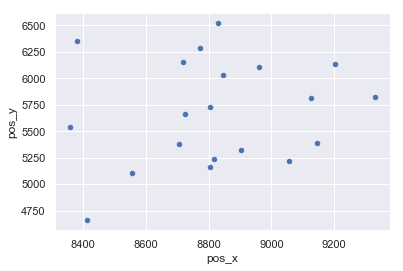

In [19]:
cc.plot.scatter('pos_x', 'pos_y')

In [20]:
label_0.groupby(['sub_label']).size()

sub_label
0     55
1     20
2     38
3      6
4     20
5     20
6     12
7     25
8      5
9      6
10    10
11    24
12    19
13     6
14    23
15     6
16     4
17     5
18     4
19    21
dtype: int64

In [21]:
label_0[label_0['sub_label']==0]

,event,match_id,team_id,player,timestamp,pos_x,pos_y,label,sub_label
42147,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herodarkseer,2389,8745.0,5673.0,0,0
42148,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herodarkseer,2389,8745.0,5673.0,0,0
42149,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herodarkseer,2389,8745.0,5673.0,0,0
42150,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herodarkseer,2389,8745.0,5673.0,0,0
42151,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herodarkseer,2389,8745.0,5673.0,0,0
42152,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herodarkseer,2389,8745.0,5673.0,0,0
42153,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herodarkseer,2389,8745.0,5673.0,0,0
42154,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herodarkseer,2389,8745.0,5673.0,0,0
42155,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herodarkseer,2389,8745.0,5673.0,0,0
42156,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,herodarkseer,2389,8745.0,5673.0,0,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


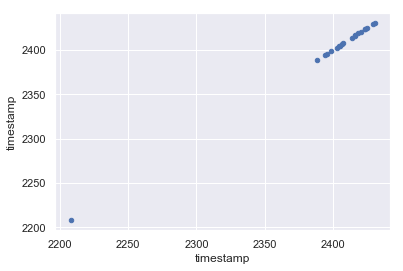

In [22]:
cc.plot.scatter('timestamp', 0)

In [23]:
ts = np.array(label_0[['timestamp', 'pos_x', 'pos_y']])

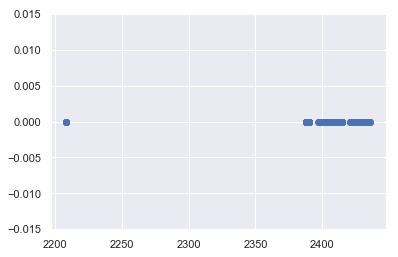

In [25]:
plt.scatter(ts[:,0], [0]*ts.shape[0])

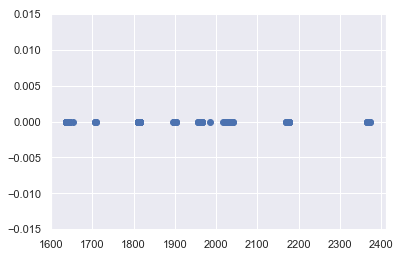

In [26]:
label_3 = data_fl[data_fl['label']==3]
ts = np.array(label_3[['timestamp', 'pos_x', 'pos_y']])
plt.scatter(ts[:,0], [0]*ts.shape[0])

# Cluster by Postion

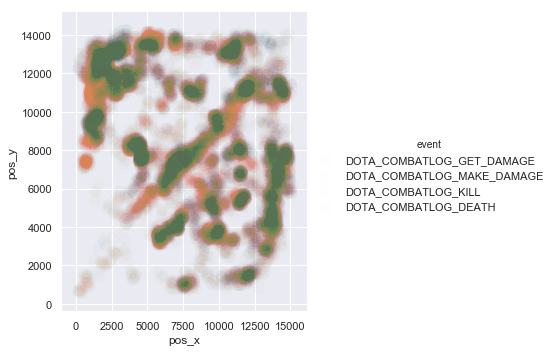

In [51]:
sns.lmplot("pos_x", "pos_y", data=shuffle(data_fl), hue="event", x_jitter=200, y_jitter=200, 
           fit_reg=False, scatter_kws={"s": 100, "alpha": 0.0075}, height=5)

In [52]:
kmeans_pos = KMeans(n_clusters=25).fit(data_fl[['pos_x', 'pos_y']])

/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


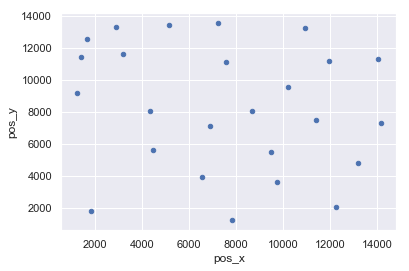

In [53]:
data_fl.loc[:, 'label'] = kmeans_pos.labels_
cc = pd.DataFrame(kmeans_pos.cluster_centers_, columns=['pos_x', 'pos_y'])
cc.plot.scatter('pos_x', 'pos_y')

In [151]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [167]:
dt = data_fl[['pos_x', 'pos_y']].as_matrix().astype("float32", copy = False)
stscaler = StandardScaler().fit(dt)
dt = stscaler.transform(dt)

/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [219]:
dbscan = DBSCAN(eps=0.05, min_samples=50).fit(dt)

In [220]:
len(set(dbscan.labels_))

82

In [221]:
labels = dbscan.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True

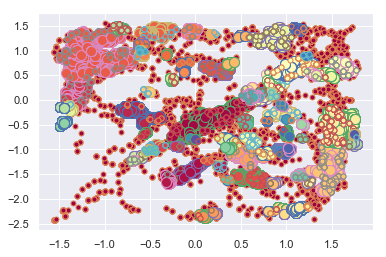

In [222]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
 
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = dt[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = dt[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)